In [1]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/weekly_degree/"

In [3]:
def extractorYear(year):
    return(int(str(year)[:4]))

In [4]:
def extractorWeek(year):
    return(int(str(year)[4:]))

In [7]:
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [8]:
frame

,Year_no,Week_no,SenderId,TargetCount,Sum_Amount
0,2020,43,277134,2,6010000000
1,2021,19,1415085,1,103620000
2,2022,18,1940083,6,1000000
3,2020,33,715797,5,2132658179
4,2021,21,1482677,2,100000000
...,...,...,...,...,...
3045209,2022,30,1839622,1,80000000
3045210,2022,2,2371288,1,2100000
3045211,2022,24,2634411,1,4000000
3045212,2022,31,2895292,1,7822000


In [7]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final = frame.sort_values(by=['year','week'])

In [8]:
final

,max_count,time_week,Total_Vertices,year,week
164,1,20181,1985,2018,1
122,1,201826,34,2018,26
39,30,201827,1738,2018,27
117,12,201828,1205,2018,28
143,6,201829,1337,2018,29
...,...,...,...,...,...
79,2005,202231,130993,2022,31
108,1720,202232,129608,2022,32
87,2207,202233,131052,2022,33
5,543,202234,115912,2022,34


<AxesSubplot: xlabel='date'>

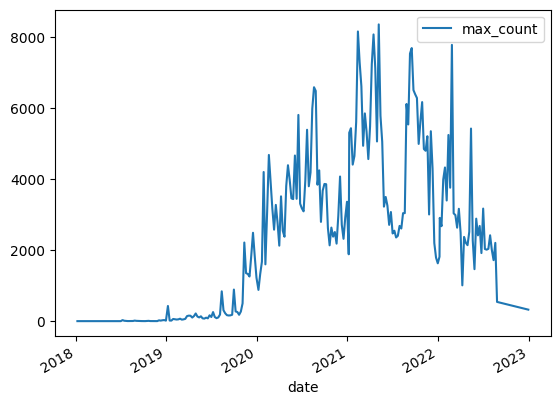

In [10]:
# Determine the date
final['date'] = pd.to_datetime(final.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(final.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
final.plot(x='date', y='max_count', ax=ax)